In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import torch
from torch import logsumexp
import torch.nn.functional as F
from torch.distributions.normal import Normal

import numpy as np
from utils_v2 import *
from plots import *
from objectives_v2 import *

In [10]:
## training parameters
NUM_SAMPLES = 1000
# ## model parameters
# p_mu = torch.tensor([0.0])
# p_sigma = torch.tensor([1.0])
q_mu = torch.tensor([8.0], requires_grad=True)
q_sigma = torch.tensor([2.0], requires_grad=True) 
# ## initialize optimizer
# optimizer = torch.optim.SGD([q_mu, q_sigma], lr=LEARNING_RATE)

In [11]:
epsilon = Normal(torch.zeros(NUM_SAMPLES), torch.ones(NUM_SAMPLES)).sample()
x = epsilon * q_sigma + q_mu
grad_mu = - q_mu - q_sigma * epsilon
grad_mu_d = - q_mu - q_sigma * epsilon + epsilon / q_sigma

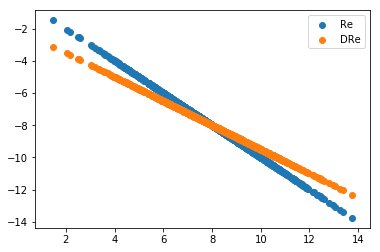

In [12]:
plt.scatter(x.data.numpy(), grad_mu.data.numpy(), label='Re')
plt.scatter(x.data.numpy(), grad_mu_d.data.numpy(), label='DRe')
plt.legend()